<a href="https://colab.research.google.com/github/Dokectis/qiskit_ca_dev_qc_ibm/blob/main/qiskit_run_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Qiskit run dev**  
1️⃣ Install dependencies  
2️⃣ Import libraries  
3️⃣ Build and visualize the quantum “double-slit” circuit  
4️⃣ Run simulation and visualize the results  
5️⃣ (Optionally) test the interference pattern by adding a phase shift  

Below is the complete, Colab-friendly version of your experiment.  

🧩 1. Install dependencies

In [2]:
# Install all required libraries
!pip install -q qiskit qiskit-aer matplotlib pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00


🧠 2. Import libraries

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


⚛️ 3. Create and draw the double-slit quantum circuit

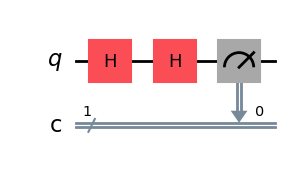

In [4]:
# Create a quantum circuit with 1 qubit and 1 classical bit
double_slit = QuantumCircuit(1, 1)

# First slit – create superposition (like passing through both slits)
double_slit.h(0)

# Optional: apply a phase shift to simulate interference difference
# Uncomment this line to experiment:
# double_slit.p(3.14159 / 2, 0)   # phase = π/2

# Second slit – recombine the paths
double_slit.h(0)

# Measure the qubit
double_slit.measure(0, 0)

# Draw the circuit
double_slit.draw('mpl')


🧮 4. Run simulation on Aer Simulator

In [5]:
# Initialize simulator
simulator = AerSimulator()

# Transpile circuit for the simulator
compiled_circuit = transpile(double_slit, simulator)

# Execute the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Extract counts (measurement outcomes)
counts = result.get_counts()

# Print and visualize results
print("Measurement results:", counts)
plot_histogram(counts)
plt.show()


Measurement results: {'0': 1024}


toggling the phase-shift line (double_slit.p(3.14159 / 2, 0)) and rerun cells 3 + 4.

Without phase shift → mostly |0⟩ (means constructive interference)

With phase = π/2 → mostly |1⟩ (destructive interference)

This mimics the quantum double-slit experiment — interference controlled by quantum phase.

A complete cell that runs both versions of the quantum “double-slit” experiment — one without a phase shift and one with a phase shift (π/2) — then displays both histograms side-by-side to show the interference effect clearly.

🌊 5. Compare Constructive vs. Destructive **Interference**

Without Phase Shift (Constructive Interference): {'0': 1024}
With Phase Shift π/2 (Destructive Interference): {'1': 512, '0': 512}


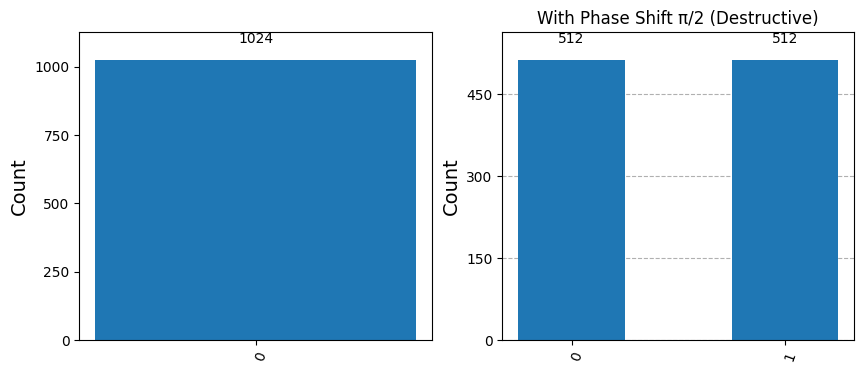

In [6]:
# --- Import needed libraries (in case you're running this cell separately) ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
simulator = AerSimulator()

# --- Circuit 1: Without Phase Shift (Constructive Interference) ---
no_phase = QuantumCircuit(1, 1)
no_phase.h(0)       # first slit (superposition)
no_phase.h(0)       # second slit (recombination)
no_phase.measure(0, 0)

# --- Circuit 2: With Phase Shift π/2 (Destructive Interference) ---
with_phase = QuantumCircuit(1, 1)
with_phase.h(0)
with_phase.p(3.14159 / 2, 0)  # phase shift = π/2
with_phase.h(0)
with_phase.measure(0, 0)

# Transpile both for the simulator
compiled_no_phase = transpile(no_phase, simulator)
compiled_with_phase = transpile(with_phase, simulator)

# Run both simulations
job1 = simulator.run(compiled_no_phase, shots=1024)
job2 = simulator.run(compiled_with_phase, shots=1024)
result1 = job1.result()
result2 = job2.result()

# Get counts
counts_no_phase = result1.get_counts()
counts_with_phase = result2.get_counts()

# Print results
print("Without Phase Shift (Constructive Interference):", counts_no_phase)
print("With Phase Shift π/2 (Destructive Interference):", counts_with_phase)

# Plot both histograms side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_histogram(counts_no_phase, title="No Phase Shift (Constructive)", ax=axes[0])
plot_histogram(counts_with_phase, title="With Phase Shift π/2 (Destructive)", ax=axes[1])
plt.show()
